In [1]:
import numpy as np, prjlib, plottools as pl, healpy as hp, pickle, curvedsky, tools_lens, binning as bn
from matplotlib.pyplot import *

In [2]:
#ntypes = ['base','goal','base_iso']
ntypes = ['base','goal','base_iso','goal_iso']
pobj = { n : prjlib.analysis_init(t='la',freq='com',ntype=n+'_roll50') for n in ntypes }
qobj = { n : tools_lens.init_qobj(pobj[n].stag,doreal=False,rlmin=300,rlmax=4096,n0max=50) for n in ntypes }

In [3]:
al, n0, ml, cl, xl, kk = {}, {}, {}, {}, {}, {}
for ntype in ntypes:
    for q in ['TT','TE','EE','EB']:
        al[ntype+q] = (np.loadtxt(qobj[ntype].f[q].al)).T[1]
        n0[ntype+q] = (np.loadtxt(qobj[ntype].f[q].n0bs)).T[1]
        ml[ntype+q] = (np.loadtxt(qobj[ntype].f[q].ml[1])).T[1]
        cl[ntype+q], xl[ntype+q], kk = np.loadtxt(qobj[ntype].f[q].mcls,unpack=True,usecols=(1,3,4))

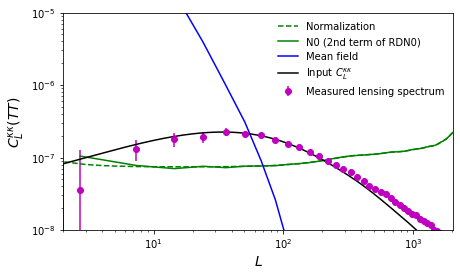

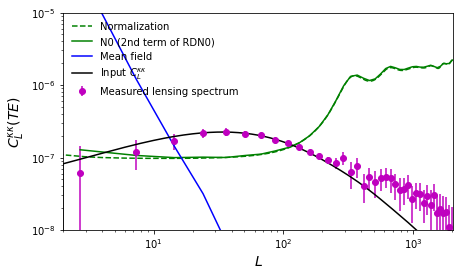

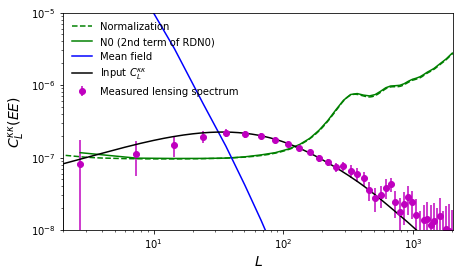

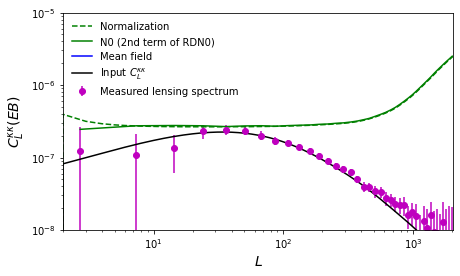

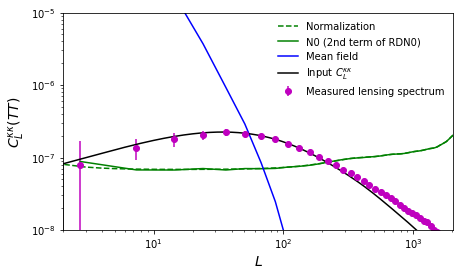

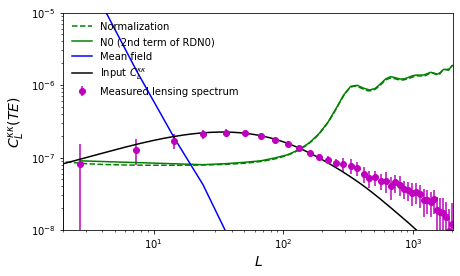

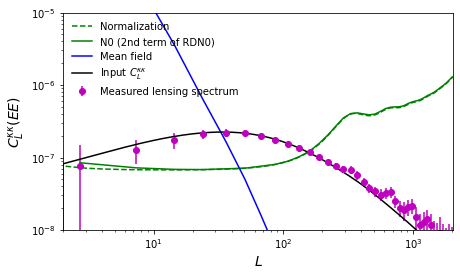

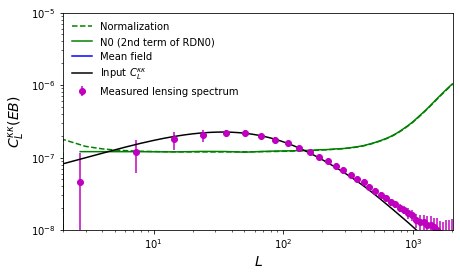

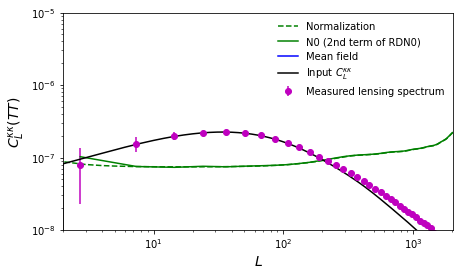

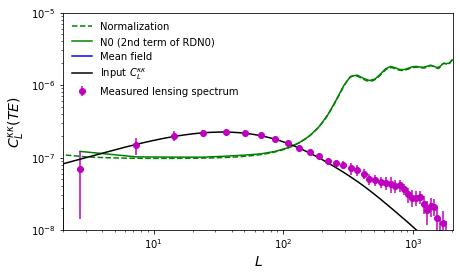

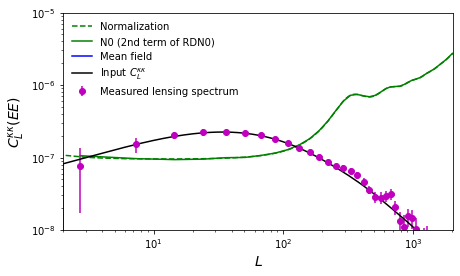

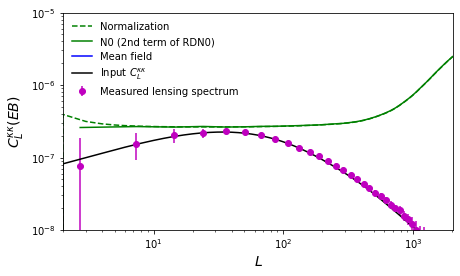

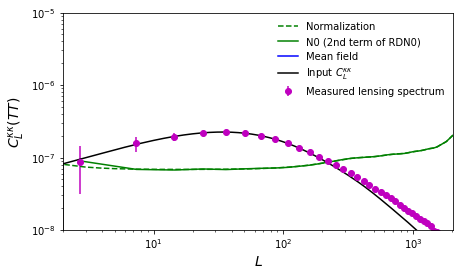

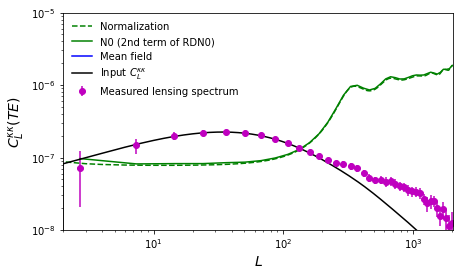

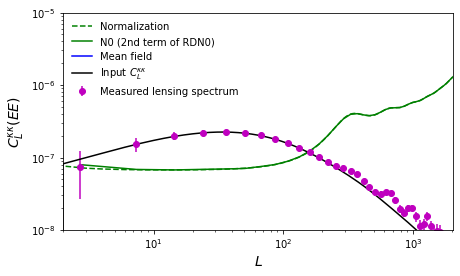

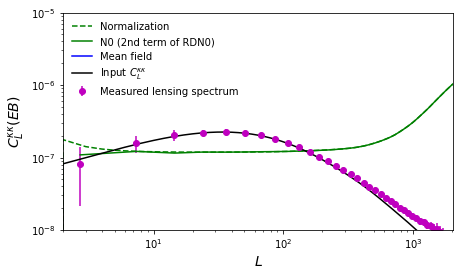

In [4]:
l = qobj['base'].l
mb = bn.multipole_binning(40,lmin=1,lmax=2048,spc='p2')
for ntype in ntypes:
    for i, q in enumerate(['TT','TE','EE','EB']):
        mkk, vkk, skk = bn.binned_spec(mb,qobj[ntype].f[q].cl[1:101],cn=1,doreal=False)
        pl.plot_1dstyle(fsize=[7,4],ylab='$C_L^{\kappa\kappa} ('+q+')$',xmin=2,xmax=2048,xlog=True,ylog=True,ymin=1e-8,ymax=1e-5)
        plot(l,al[ntype+q],'g--',label='Normalization')
        plot(mb.bc,bn.binning(n0[ntype+q],mb),'g',label='N0 (2nd term of RDN0)')
        plot(mb.bc,bn.binning(ml[ntype+q]-cl[ntype+q]/100.,mb),'b',label='Mean field')
        errorbar(mb.bc,bn.binning(cl[ntype+q]-n0[ntype+q]-cl[ntype+q]/100.,mb),yerr=vkk,fmt='o',label='Measured lensing spectrum',color='m')
        plot(pobj['base'].l,pobj['base'].kk,'k',label=r'Input $C_L^{\kappa\kappa}$')
        legend()
        show()

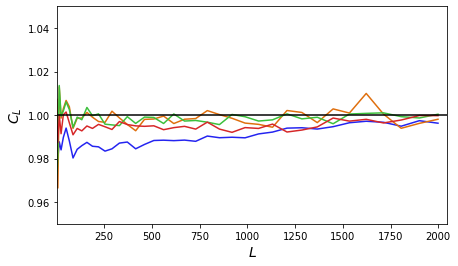

In [8]:
pl.plot_1dstyle(xmin=2,xmax=2048,ymin=0.95,ymax=1.05)
for q in ['TT','TE','EE','EB']:
    plot(mb.bc,bn.binning(xl[ntype+q],mb)/bn.binning(pobj['base'].kk[:qobj[ntype].olmax+1],mb))
axhline(1,color='k')
#savefig('fig_xcl_'+q+'.png')